In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [2]:
Oretail = pd.read_excel("Online Retail.xlsx")
Oretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Performing a preliminary data inspection and data cleaning

In [3]:
# Check for missing data and formulate an apt strategy to treat them
Oretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# Finding and removing any duplicate values, if present.
Oret = Oretail[Oretail.duplicated()]
print(Oret)

       InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

               InvoiceDate  UnitPrice  CustomerID         Country  
517    2010-12-01 11:45:00     

In [5]:
# Perform Descriptive Analysis on the given data
import warnings
warnings.filterwarnings("ignore")

Oretail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Cohort Analysis
#### Create month cohorts and analyze active customers for each month

In [6]:
import time
from datetime import date
from datetime import datetime
from datetime import timedelta

In [7]:
Oretail["InvoiceDate"] =  pd.to_datetime(Oretail["InvoiceDate"], format= "%m/%d/%Y %H:%M")

In [8]:
Oretail["OrderMonth"] = Oretail["InvoiceDate"].dt.to_period("M")

In [9]:
Oretail["Cohort"] = Oretail.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")

In [10]:
OretailCohort = Oretail.groupby(["Cohort", "OrderMonth"]).agg(n_customers = ("CustomerID", "nunique")).reset_index(drop = False)

In [11]:
from operator import attrgetter
OretailCohort["PeriodNumber"] = (OretailCohort.OrderMonth - OretailCohort.Cohort).apply(attrgetter("n"))

In [12]:
OretailCohort.head()

,Cohort,OrderMonth,n_customers,PeriodNumber
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


In [13]:
CohortPivot = OretailCohort.pivot_table(index = "Cohort", columns = "PeriodNumber", values = "n_customers")

In [14]:
CohortPivot

PeriodNumber,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analyze the retention of customers

In [15]:
CohortSize = CohortPivot.iloc[:,0]

In [16]:
RetentionMatrix = CohortPivot.divide(CohortSize, axis = 0)

NameError: name 'mcolors' is not defined

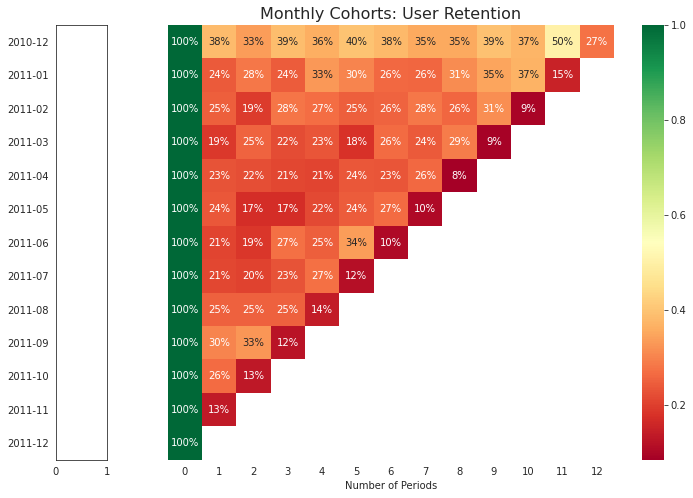

In [17]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={"width_ratios":[1,11]})
    # retention matrix
    sns.heatmap(RetentionMatrix,
               mask = RetentionMatrix.isnull(),
               annot = True,
               fmt = ".0%",
               cmap = "RdYlGn",
               ax = ax[1])
    ax[1].set_title("Monthly Cohorts: User Retention", fontsize = 16)
    ax[1].set(xlabel="Number of Periods", 
              ylabel="")
    
    #cohort size 
    CohortSize_Oretail = pd.DataFrame(CohortSize).rename(columns={0:"CohortSize"})
    white_cmap = mcolors.ListedColormap(["white"])
    sns.heatmap(CohortSize_Oretail,
               annot = True,
               cbar = False,
               fmt = "g",
               cmap =white_cmap,
               ax = ax[0])
    fig.tight_layout()

#### Comment: In the heatmap, we can see that there is a huge decrease in the second month (indexed as 1). +- 80% of customers do not make any purchase in the second month. The first cohort (2010–12) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 50% retention.

## Build a RFM Model
#### a) Calculate RFM metrics

In [18]:
# Recency as the time in number of days since last transaction.
Oretail_Recency = Oretail.groupby(by = "CustomerID", as_index = False)["InvoiceDate"].max()
Oretail_Recency.columns = ["CustomerID", "LastPurchaseDate"]
RecentDate = Oretail_Recency["LastPurchaseDate"].max()
Oretail_Recency["Recency"] = Oretail_Recency["LastPurchaseDate"].apply(lambda x: (RecentDate - x).days)
Oretail_Recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [22]:
# Frequency as count of purchases done.
Oretail_Frequency = Oretail.drop_duplicates().groupby(by = ["CustomerID"], as_index = False)["InvoiceDate"].count()
Oretail_Frequency.columns = ["CustomerID", "Frequency"]
Oretail_Frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [21]:
# Monetary value as total amount spent.
Oretail["Total"] = Oretail["UnitPrice"]*Oretail["Quantity"]
Oretail_Monetary = Oretail.groupby (by = "CustomerID", as_index = False)["Total"].sum()
Oretail_Monetary.columns = ["CustomerID", "Monetary"]
Oretail_Monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [23]:
rf_Oretail = Oretail_Recency.merge(Oretail_Frequency, on = "CustomerID")
rfm_Oretail = rf_Oretail.merge(Oretail_Monetary, on = "CustomerID").drop(columns = "LastPurchaseDate")
rfm_Oretail.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


In [24]:
# Give recency, Frequency and Monetary scores individually by dividing them into quartiles
rfm_Oretail["R_rank"] = rfm_Oretail["Recency"].rank(ascending = False)
rfm_Oretail["F_rank"] = rfm_Oretail["Frequency"].rank(ascending = True)
rfm_Oretail["M_rank"] = rfm_Oretail["Monetary"].rank(ascending = True)

## normalizing the rank of customers
rfm_Oretail["R_rank_norm"] = (rfm_Oretail["R_rank"]/rfm_Oretail["R_rank"].max())*100
rfm_Oretail["F_rank_norm"] =(rfm_Oretail["F_rank"]/rfm_Oretail["F_rank"].max())*100
rfm_Oretail["M_rank_norm"] = (rfm_Oretail["F_rank"]/rfm_Oretail["M_rank"].max())*100

rfm_Oretail.drop(columns = ["R_rank", "F_rank", "M_rank"], inplace = True)
rfm_Oretail.head()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,2,0.00,3.865741,2.493138,2.493138
1,12347.0,1,182,4310.00,97.719907,88.129003,88.129003
2,12348.0,74,31,1797.24,38.182870,42.074565,42.074565
3,12349.0,18,73,1757.55,72.974537,66.720037,66.720037
4,12350.0,309,17,334.40,5.578704,24.794145,24.794145


In [26]:
rfm_Oretail["RFM_Score"] = 0.15*rfm_Oretail["R_rank_norm"] + 0.28 * rfm_Oretail["F_rank_norm"] + 0.57 * rfm_Oretail["M_rank_norm"]
rfm_Oretail["RFM_Score"] *=0.04
rfm_Oretail =rfm_Oretail.round(2)
rfm_Oretail[["CustomerID", "RFM_Score"]].head(7)

,CustomerID,RFM_Score
0,12346.0,0.11
1,12347.0,3.58
2,12348.0,1.66
3,12349.0,2.71
4,12350.0,0.88
5,12352.0,2.85
6,12353.0,0.27


#### Comment: The customer with ID no.12347.0 is the best customer as they have the highest RFM score. This customer has returned over a hundred times to purchase although they have a long recency. Customer 12350.0 was the second most recent customer to purchase something. Customer 12346.0 although with a highest recency, they have never purchased anything and have not contributed any monetary value.

## Create clusters using k means clustering algorithm

#### a) Prepare the data for the algorithm. If the data is assymetrically distributed, manage the skewness with appropriate transformation. Standardize the data

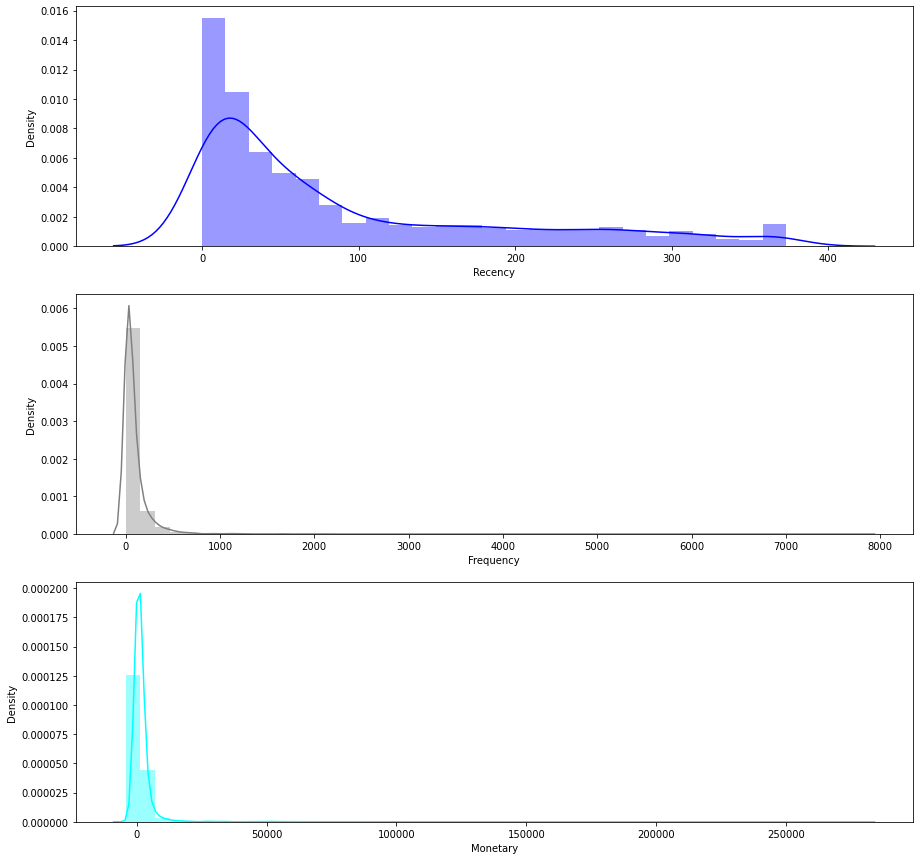

In [27]:
figs, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_Oretail.Recency, color = "blue", ax=axes[0], axlabel = "Recency")
sns.distplot(rfm_Oretail.Frequency, color = "grey", ax=axes[1], axlabel = "Frequency")
sns.distplot(rfm_Oretail.Monetary, color = "cyan", ax=axes[2], axlabel = "Monetary")
plt.show()

In [28]:
# Create a copy of rfm table
scaled_rfm_Oretail = rfm_Oretail.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
scaled_rfm_Oretail.Monetary = scaled_rfm_Oretail.Monetary + abs(scaled_rfm_Oretail.Monetary.min()) + 1
scaled_rfm_Oretail.Recency = scaled_rfm_Oretail.Recency + abs(scaled_rfm_Oretail.Recency.min()) + 1

# Check the summary of new values
scaled_rfm_Oretail.describe()

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,15299.677722,92.047118,91.858188,6187.089700,50.613550,50.010890,50.010890,2.004014
std,1722.390705,100.765435,229.223566,8219.345141,29.216673,28.869659,28.869659,1.081229
min,12346.000000,1.000000,1.000000,1.000000,0.090000,0.910000,0.910000,0.030000
25%,13812.750000,17.000000,17.000000,4581.992500,25.320000,24.790000,24.790000,1.070000
50%,15300.500000,50.000000,41.000000,4936.705000,50.610000,49.860000,49.860000,2.000000
75%,16778.250000,143.000000,99.250000,5900.355000,75.720000,74.920000,74.920000,2.920000
max,18287.000000,374.000000,7812.000000,283777.650000,100.000000,100.000000,100.000000,4.000000


In [29]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_OnlineRetail = np.log(scaled_rfm_Oretail)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_OnlineRetail = scaler.fit_transform(log_OnlineRetail)
normal_OnlineRetail = pd.DataFrame(data=normal_OnlineRetail, index=rfm_Oretail.index, columns=rfm_Oretail.columns)

In [30]:
normal_OnlineRetail

,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,-1.832156,1.402917,-2.232791,-0.694689,-2.283588,-2.791927,-2.791927,-3.348941
1,-1.831443,-2.075135,1.143909,1.216783,0.970994,0.896849,0.896849,1.012679
2,-1.830730,0.399593,-0.181077,0.267050,0.023711,0.132025,0.132025,0.050160
3,-1.830017,-0.537936,0.460053,0.249071,0.676609,0.609002,0.609002,0.663996
4,-1.829304,1.368554,-0.630799,-0.488376,-1.914737,-0.414998,-0.414998,-0.744670
...,...,...,...,...,...,...,...,...
4367,1.623429,1.294161,-1.028012,-0.581345,-1.504838,-0.978267,-0.978267,-1.356278
4368,1.623911,1.001152,-1.295009,-0.643388,-0.628526,-1.391892,-1.391892,-1.584616
4369,1.624392,-1.128562,-0.831614,-0.583806,0.861143,-0.683064,-0.683064,-0.377284
4370,1.624874,-1.601849,2.174416,0.398253,0.919683,1.019543,1.019543,1.129497


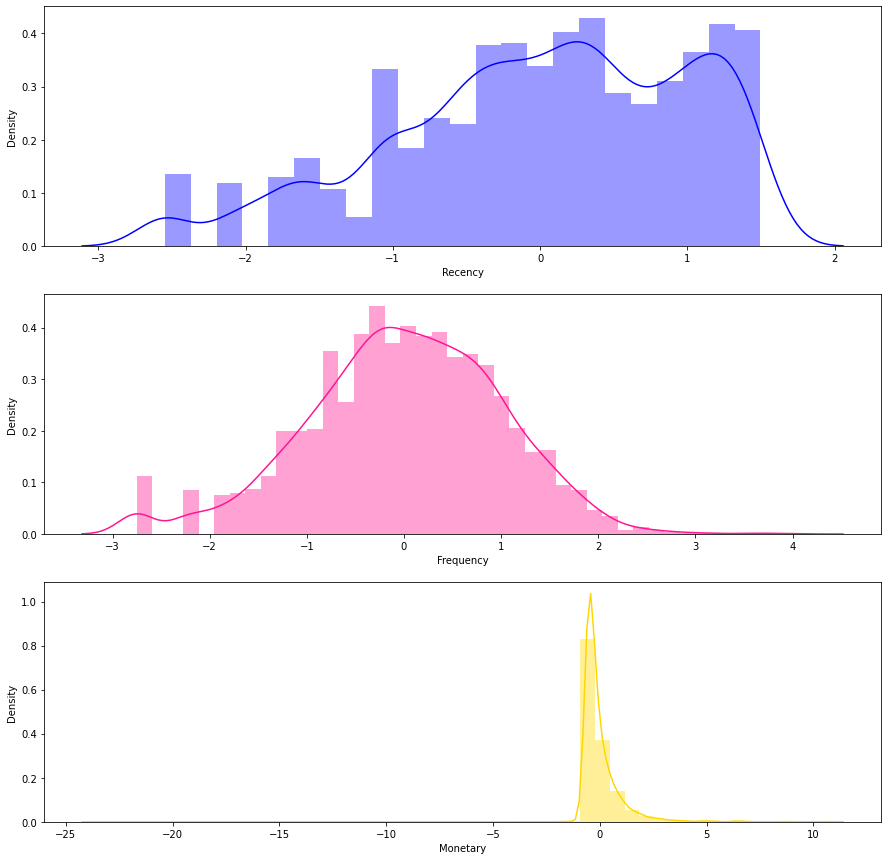

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_OnlineRetail.Recency , color="blue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_OnlineRetail.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_OnlineRetail.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show()

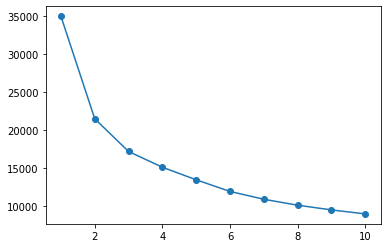

In [32]:
# find Within Cluster Sum of Squares 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_OnlineRetail)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o')

In [33]:
#for use in Tableau
ElbowPlot = pd.DataFrame({'Cluster': range(1,11) , 'SSE': wcss})
ElbowPlot.to_excel('Elbow Plot Data.xlsx')

Silhouette score for number of cluster(s) 3: 0.2661918100056948
Silhouette score for number of cluster(s) 4: 0.22263597487180203
Silhouette score for number of cluster(s) 5: 0.22629575320103473
Silhouette score for number of cluster(s) 6: 0.23747072456202484
Silhouette score for number of cluster(s) 7: 0.2335295254246367
Silhouette score for number of cluster(s) 8: 0.22466450506551564
Silhouette score for number of cluster(s) 9: 0.22186075355937263
Silhouette score for number of cluster(s) 10: 0.22370322607119358
Silhouette score for number of cluster(s) 11: 0.22348948072432043


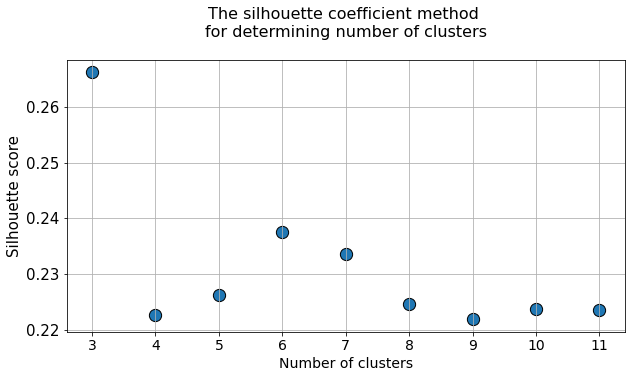

In [35]:
# Decide the optimum number of clusters to be formed
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(3,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_OnlineRetail)
    preds = km.predict(normal_OnlineRetail)    
    silhouette = silhouette_score(normal_OnlineRetail,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(3,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(3,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

#### Here we can clearly see that optimum number of clusters should be 4 because that is the only point after which the mean cluster distance looks to be plateaued after a steep downfall. So we will assume the 4 number of clusters as best for grouping of customer segments.



In [36]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_OnlineRetkmeansail)
cluster_labels = kmeans.labels_

In [37]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [40]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM Online Retail dataframe is {rfm_Oretail.shape}")

Shape of cluster label array is (4372,)
Shape of RFM Online Retail dataframe is (4372, 8)


In [44]:
# analyze the clusters and comment on the results.
Cluster_table = rfm_Oretail.assign(Cluster = cluster_labels)

In [45]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

3    1881
0    1241
1     744
2     506
Name: Cluster, dtype: int64

#### Here we see that most of the customers belong to 0 ,1 and 3 cluster, whereas very less number of customers assigned to 2 cluster, may be possible that those are some of the best customers out of the pool or the worst customer.